# Shor's Algorithm

by Sawit, Pearploy, Chompunuch

---

## Chapter 1 : What is Encryption?

Encryption คือการเข้ารหัสจาก Plaintext ไปเป็น Ciphertext เพื่อป้องกันไม่ให้คนนอกสามารถอ่านเข้าใจ ยกตัวอย่างการส่งสารผ่านนกพิราบ

การเข้ารหัสจะผ่านสิ่งที่เรียกว่า กุญแจ (Key) โดยที่กุญแจอาจจะเป็นตัวเลขหรือวิธีการที่จะถอดรหัส (Decrypt) กลับมาเพื่ออ่านได้

ยกตัวอย่าง การเข้ารหัส Caesar Cipher

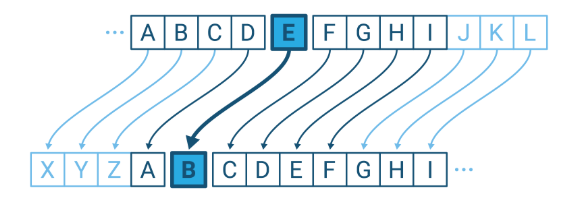

จากภาพ การเข้ารหัสแบบ Caesar Cipher ด้านบนคือการเลื่อนตัวอักษรกลับไป 3 ตัวอักษร ฉะนั้น Key คือ "3"

In [1]:
def encrypt_caesar(message, key):
    result = ""
    for letter in message:
        if letter.isalpha():
            if letter.islower():
                result += chr((ord(letter) - ord('a') + key) % 26 + ord('a'))
            else:
                result += chr((ord(letter) - ord('A') + key) % 26 + ord('A'))
        else:
            result += letter
    return result

def decrypt_caesar(message, key):
    return encrypt_caesar(message, -key)

In [3]:
message = "Hello"
key = 3

encrypted_text = encrypt_caesar(message, key)
print(encrypted_text)

decrypted_text = decrypt_caesar(encrypted_text, key)
print(decrypted_text)

Khoor
Hello


### ประเภทของการเข้ารหัส (Encryption)

เราสามารถแบ่งได้ทั้งหมด 2 ประเภท ได้แก่

1. Symmetric encryption - การเข้ารหัสแบบสมมาตร โดยมีแค่ กุญแจเดียว ใช้ทั้งสำหรับเข้ารหัสและถอดรหัส

ตัวอย่างอัลกอริทึม เช่น Caesar Cipher, AES, 3-DES, SNOW

2. Asymmetric encryption (Public Key encryption) - การเข้ารหัสไม่สมมาตร มีสองกุญแจ ได้แก่ Public Key ซึ่งเอาไว้เข้ารหัส เผยแพร่ให้ทุกคนใช้ได้ อีกอันคือ Private key ซึ่งเอาไว้ถอดรหัส จะถูกเก็บไว้เป็นความลับ

ตัวอย่างอัลกอริทึม เช่น RSA

### การเข้ารหัสแบบ RSA (Rivest-Shamir-Adleman)

คณิตศาสตร์เบื้องต้นสำหรับ RSA

* Prime Number - จำนวนเฉพาะ คือ จำนวนเต็มบวกที่มีเลข 1 และตัวมันเองหารตัวเองลง

* Greatest Common Divisor (GCD) - หารร่วมมากโดยใช้ prime factorization เช่น gcd(24, 36) = 12

* Relatively Prime - ถ้า gcd(a, b) = 1 หรือทั้งสองไม่มี prime factors ร่วมเลย

* Congruent Modulo - 10 mod 2 = 0 และ 4 mod 2 = 0 ดังนั้น "10 congruent 4 mod 2"

* Euler's totient function - ถ้า p, q เป็นจำนวนเฉพาะ และ n = pq ดังนั้น ϕ(n) = (p-1)(q-1)

* Euler's theorem - เมื่อ m และ n เป็น relatively prime แล้ว m ยกกำลังด้วย Euler's totient ของ n จะ Congruent กับ 1 mod n

สมมติว่า กล่องใส่ของขวัญ Alice เป็น `n = pq` โดยที่ p,q เป็นจำนวนเฉพาะที่เราเลือกมา

แม่กุญแจของ Alice (Public Key) คือ จำนวนเต็มบวก `e` (Encrypt) ดังนั้น (n,e) คือ Public Key

ส่วนลูกกุญแจของ Alice คือจำนวนเต็มบวก `d` (Decrypt) มีค่าเท่ากับ
<div style="background-color: white; width: 400px;">
<img src="https://miro.medium.com/v2/resize:fit:498/format:webp/1*JKzhHyj4cbKaIELr4z5Klw.png">
</div>

หรือบอกได้เป็น จะมีจำนวนเต็ม k ที่ทำให้ de = k x Euler's totient ของ n + 1
<div style="background-color: white; width: 400px;">
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*aQ4XnC1a9qUdcYZ4tmL6Dw.png">
</div>


`m` คือตัวเลขหรือข้อความที่ Bob ต้องการส่งให้ Alice


Note : ค่าของ `e` ที่เราเลือกสำหรับ Encrypt นั้นจะต้องเป็น Relative Prime กับ Euler's Totient Function `ϕ(n)`

<u>การเข้ารหัสคือ</u> การนำ `m` ยกกำลังด้วย `e` แล้ว mod ด้วย n

<div style="background-color: white; width: 400px;">
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*pQWeeAc7ZYstDx7Eu-EfLw.png">
</div>

<u>การถอดรหัสคือ</u> เอาข้อความที่เข้ารหัสมา ยกกำลังด้วย `d` แล้ว mod ด้วย n

<div style="background-color: white; width: 400px;">
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*oxLMqlg9WUV8Rk_QZE4Axg.png">
</div>

### ตัวอย่างการเข้ารหัส RSA

ในการค่า `d` ขออนุญาตใช้สูตร modulolar inverse โดยตรง เนื่องจากตามทฤษฏี เราจำเป็นต้องหาค่า `k` ก่อน
แต่ถ้าหากใช้ modular inverse ก็จะแทนค่าออกได้เลย


In [51]:
import math

# Define the parameters
p = 3
q = 7
n = p * q
e = 11
phi = (p - 1) * (q - 1)

# Ensure e is co-prime with phi
while e < phi:
    if math.gcd(e, phi) == 1:
        break
    else:
        e = e + 1

# Function to find the modular inverse of e modulo phi
def mod_inverse(e, phi):
    g, x, y = extended_gcd(e, phi)
    if g != 1:
        raise Exception('Modular inverse does not exist')
    else:
        return x % phi

# Extended Euclidean Algorithm
def extended_gcd(a, b):
    if a == 0:
        return b, 0, 1
    g, x1, y1 = extended_gcd(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return g, x, y

# Calculate the private key d
d = mod_inverse(e, phi)

# Message to be encrypted
msg = 12

print("Message data =", msg)

# Encryption c = (msg ^ e) % n
c = pow(msg, e, n)
print("Encrypted data =", c)

# Decryption m = (c ^ d) % n
m = pow(c, d, n)
print("Original Message Sent =", m)

Message data = 12
Encrypted data = 3
Original Message Sent = 12


---

## Chapter 2 : Quantum Algorithm - Shor's Algorithm

### การคำนวณและหลักการของ Shor’s Algorithm

---

Shor's algorithm มีส่วนประกอบที่สำคัญคือ `Euclid's Algorithm`

หมายเหตุ: ตัวเลขที่จะทำการเลือกมาเพื่อใช้ในการแยกตัวประกอบนั้น

จะมีเงื่อนไข ดังนี้ 1.ไม่เป็นจำนวนเฉพาะ 2.เป็นเลขคี่ 3.ไม่อยู่ในรูป n*(n^x)

1. ให้เราสุ่มค่า `N` หรือตัวเลขที่เราต้องการแยกตัวประกอบ

2. ทำ การสุ่มตัวเลขระหว่าง 1 ถึง N แทนเลขนั้นด้วย `k`

3. หา GCD(N,k) ถ้าหากได้ 1 ให้ทำต่อ เนื่องจากเป็น Relative Prime

4. หาคาบของฟังก์ชัน `r` โดยดูค่าจาก f(x) = k^x mod N

   4.1 ทำการกำหนดตัวแปร q = 1
   
   4.2 หาค่า (q * k) mod N ซึ่งหาจนกว่าส่วนที่เหลือจากสมการจะเป็น 1 แล้วนับคาบ

5. หากค่า r ที่ได้เป็นเลขคี่ ให้ไปขั้นตอน 2 แล้วเลือกค่า k ใหม่

6. ทำการกำหนดค่า `p` เป็นเศษที่ได้จากการหาคาบของฟังก์ชันรอบที่ r / 2 ถ้าหากค่า p + 1 = N ให้กลับขั้นตอนที่ 2 แล้วหาค่า k ใหม่

7. การหาตัวประกอบด้วย Shor's algorithm

   f1 (ตัวประกอบตัวแรก) = GCD(p+1, N)

   f2 (ตัวประกอบตัวที่สอง) = GCD(p-1, N)

ตัวอย่างโค้ดการทำ Shor's Algorithm ในแบบ Classical Computing

In [52]:
import random
import math

def find_periodic(k, N):
    q = 1
    count = 0
    while True:
        q = q * k % N
        count += 1
        if q == 1:
            break

    return count

def find_p(k, r, N):
    q = 1
    count = 0
    while True:
        q = q * k % N
        count += 1
        if count == r/2:
            break

    return q

def Shor_Algorithm(number):

    saved = []
    while True:

        k = random.randint(1, number)

        if k in saved:
            continue


        if math.gcd(number, k) != 1:
            saved.append(k)
            continue
        
        r = find_periodic(k, number)
        if r % 2 != 0:
            saved.append(k)
            continue

        p = find_p(k, r, number)

        if (p+1) == number:
            saved.append(k)
            continue

        f1 = math.gcd(p+1, number)
        f2 = math.gcd(p-1, number)
        return f1, f2

In [53]:
N = int(input("Enter the value of N: "))

f1, f2 = Shor_Algorithm(N)
print(f1, f2)

7 3


---

## Chapter 3 : Quantum Computing Application

การประยุกต์ในระดับ Quantum Computing เพื่อการคำนวณให้เร็วขึ้น

Note : Run time on the classical computer is O[exp (L1/3(log L)2/3)] but that on the quantum computer is O(L3).

---

* เนื่องจากความช้าในการหาคาบของ Periodic Function โดยการประยุกต์ QFT (Quantum Fourier Transforms)
บอกได้ว่าปัญหาของการหาตัวประกอบ (factoring problem) นั้นสามารถเปลี่ยนเป็นการหาคาบที่เกิดจากฟังก์ชัน (period problem) แทนได้ใน polynomial time

f(x) = a^x mod N

เราจะใช้ Quantum Phase Estimation (QPE) ที่มี Quantum Fourier Transform (QTF) มาปรับใช้กับ Shor's Algorithm

---

References :

* Encryption

https://www.cloudflare.com/learning/ssl/what-is-encryption/

https://community.ibm.com/community/user/ibmz-and-linuxone/blogs/subhasish-sarkar1/2020/07/04/caesar-cipher?communityKey=8bcc5745-f7d5-43e3-a7ef-a4801c68c752

* RSA Algorithm

https://medium.com/@phiphatchomchit/%E0%B8%84%E0%B8%93%E0%B8%B4%E0%B8%95%E0%B8%A8%E0%B8%B2%E0%B8%AA%E0%B8%95%E0%B8%A3%E0%B9%8C%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%AB%E0%B8%A5%E0%B8%B1%E0%B8%87-rsa-encryption-%E0%B8%A7%E0%B8%B4%E0%B8%98%E0%B8%B5%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A3%E0%B8%AB%E0%B8%B1%E0%B8%AA%E0%B9%83%E0%B8%99%E0%B9%82%E0%B8%A5%E0%B8%81%E0%B8%AD%E0%B8%B4%E0%B8%99%E0%B9%80%E0%B8%97%E0%B8%AD%E0%B8%A3%E0%B9%8C%E0%B9%80%E0%B8%99%E0%B9%87%E0%B8%95-b25e7265834d

https://medium.com/@phiphatchomchit/fermat-factorization-algorithm-can-break-poor-rsa-encryption-3c657848cc87

https://www.geeksforgeeks.org/rsa-algorithm-cryptography/

* Shor's Algorithm

https://ksupasate.medium.com/shors-algorithm-part-1-449c1cd21b74

https://ksupasate.medium.com/shors-algorithm-part-2-19ec928ff5b

https://www.geeksforgeeks.org/shors-factorization-algorithm/

https://khunpanya.wordpress.com/2016/07/31/shors-algorithm/
